<a href="https://colab.research.google.com/github/Divya6265/employee-performance/blob/main/Employee_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Loading Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import plotly.express as px

In [18]:
# importing dataset
data=pd.read_csv("/employment_data.csv")

In [19]:
# showing first five rows
data.head()

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
0,Afghanistan,350285.606,6.5,607.476,506.230,3.57,1334.243,5424.911,16.2
1,Angola,457913.433,8.6,1075.838,896.532,1.70,4612.109,4724.669,27.1
2,Albania,49922.483,3.9,51.087,42.572,1.77,500.112,651.870,25.5
3,United Arab Emirates,320690.368,9.3,824.579,687.149,0.41,996.030,5111.770,38.6
4,Argentina,525994.010,21.0,3492.559,2910.466,1.43,7264.330,9496.191,18.1


# Data Descriptive Analysis

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               283 non-null    object 
 1   total_weekly_hours_worked(estimates_in_thousands)     283 non-null    float64
 2   percentage_of_working_hrs_lost                        283 non-null    float64
 3   percent_hours_lost_40hrs_per_week                     283 non-null    float64
 4   percent_hours_lost_48hrs_per_week                     283 non-null    float64
 5   labour_dependency_ratio                               283 non-null    float64
 6   employed_female_25+_2019                              283 non-null    float64
 7   employed_male_25+_2019                                283 non-null    float64
 8   ratio_of_weekly_hours_worked_by_population_age_15-64  283 non

In [21]:
# check missing values count
data.isnull().sum()

country                                                 0
total_weekly_hours_worked(estimates_in_thousands)       0
percentage_of_working_hrs_lost                          0
percent_hours_lost_40hrs_per_week                       0
percent_hours_lost_48hrs_per_week                       0
labour_dependency_ratio                                 0
employed_female_25+_2019                                0
employed_male_25+_2019                                  0
ratio_of_weekly_hours_worked_by_population_age_15-64    0
dtype: int64

In [22]:
# showing distinct countries
data['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
     

In [23]:
data_list = ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong, China', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Islamic Republic of', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Cambodia', 'Korea, Republic of', 'Kuwait',
       "Lao People's Democratic Republic", 'Lebanon', 'Liberia', 'Libya',
       'Saint Lucia', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg',
       'Latvia', 'Macau, China', 'Morocco', 'Moldova, Republic of',
       'Madagascar', 'Maldives', 'Mexico', 'North Macedonia', 'Mali',
       'Malta', 'Myanmar', 'Montenegro', 'Mongolia', 'Mozambique',
       'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
       'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands',
       'Norway', 'Nepal', 'New Zealand', 'Oman', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Papua New Guinea', 'Poland', 'Puerto Rico',
       "Korea, Democratic People's Republic of", 'Portugal', 'Paraguay',
       'Occupied Palestinian Territory', 'French Polynesia', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan',
       'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone',
       'El Salvador', 'Somalia', 'Serbia', 'South Sudan',
       'Sao Tome and Principe', 'Suriname', 'Slovakia', 'Slovenia',
       'Sweden', 'Eswatini', 'Syrian Arab Republic', 'Chad', 'Togo',
       'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan, China',
       'Tanzania, United Republic of', 'Uganda', 'Ukraine', 'Uruguay',
       'United States', 'Uzbekistan', 'Saint Vincent and the Grenadines',
       'Venezuela, Bolivarian Republic of','United States Virgin Islands',
       'Viet Nam', 'Vanuatu', 'Samoa', 'MENA', 'CARICOM', 'Yemen',
       'South Africa','Zambia', 'Zimbabwe']

In [24]:
# select only the records from data.country that matches with data_list values
# selecting records with uniques countries from original data
data_sv = data[data.country.isin(data_list)]


In [25]:
data_sv['country'].unique()


array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
     

In [26]:
data_sv.describe()


,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
count,1.910000e+02,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,6.885493e+05,8.832461,1664.397037,1386.997560,1.630366,5976.241461,9749.394340,23.658639
std,2.817152e+06,4.813533,6120.928039,5100.773359,0.695516,23945.332734,38490.673878,4.847041
min,9.957450e+02,-0.100000,-4.467000,-3.723000,0.320000,10.830000,15.210000,12.000000
25%,3.589832e+04,5.150000,60.255000,50.212000,1.160000,331.813000,564.053500,20.550000
50%,1.382258e+05,8.600000,266.058000,221.715000,1.450000,1304.032000,1878.262000,23.600000
75%,4.200822e+05,11.750000,1038.897500,865.748000,1.920000,3840.236000,5637.803500,26.450000
max,3.324396e+07,27.500000,71600.118000,59666.765000,4.580000,306274.252000,391436.456000,39.100000


from matplotlib import pyplot as plt
_df_0['total_weekly_hours_worked(estimates_in_thousands)'].plot(kind='hist', bins=20, title='total_weekly_hours_worked(estimates_in_thousands)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['percentage_of_working_hrs_lost'].plot(kind='hist', bins=20, title='percentage_of_working_hrs_lost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['percent_hours_lost_40hrs_per_week'].plot(kind='hist', bins=20, title='percent_hours_lost_40hrs_per_week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['percent_hours_lost_48hrs_per_week'].plot(kind='hist', bins=20, title='percent_hours_lost_48hrs_per_week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_weekly_hours_worked(estimates_in_thousands)', y='percentage_of_working_hrs_lost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='percentage_of_working_hrs_lost', y='percent_hours_lost_40hrs_per_week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='percent_hours_lost_40hrs_per_week', y='percent_hours_lost_48hrs_per_week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='percent_hours_lost_48hrs_per_week', y='labour_dependency_ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['total_weekly_hours_worked(estimates_in_thousands)'].plot(kind='line', figsize=(8, 4), title='total_weekly_hours_worked(estimates_in_thousands)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['percentage_of_working_hrs_lost'].plot(kind='line', figsize=(8, 4), title='percentage_of_working_hrs_lost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['percent_hours_lost_40hrs_per_week'].plot(kind='line', figsize=(8, 4), title='percent_hours_lost_40hrs_per_week')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['percent_hours_lost_48hrs_per_week'].plot(kind='line', figsize=(8, 4), title='percent_hours_lost_48hrs_per_week')
plt.gca().spines[['top', 'right']].set_visible(False)

# Exploratory Data Analysis

<ipython-input-27-68cf493d3581>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_sv.corr(),annot=True,linewidth = 1, cmap='coolwarm')


<Axes: >

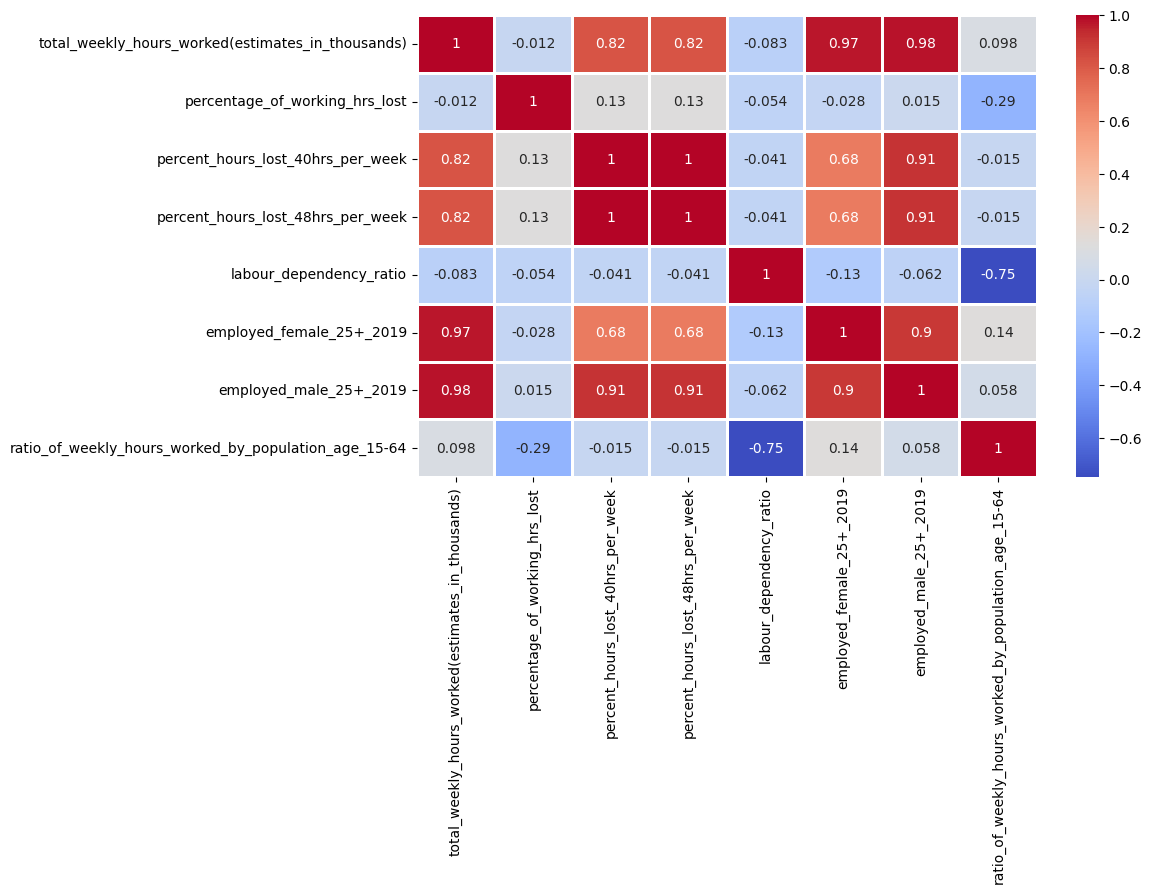

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(data_sv.corr(),annot=True,linewidth = 1, cmap='coolwarm')

<ipython-input-28-15f4856deee9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_sv.corr()[['total_weekly_hours_worked(estimates_in_thousands)']].sort_values(


<Axes: >

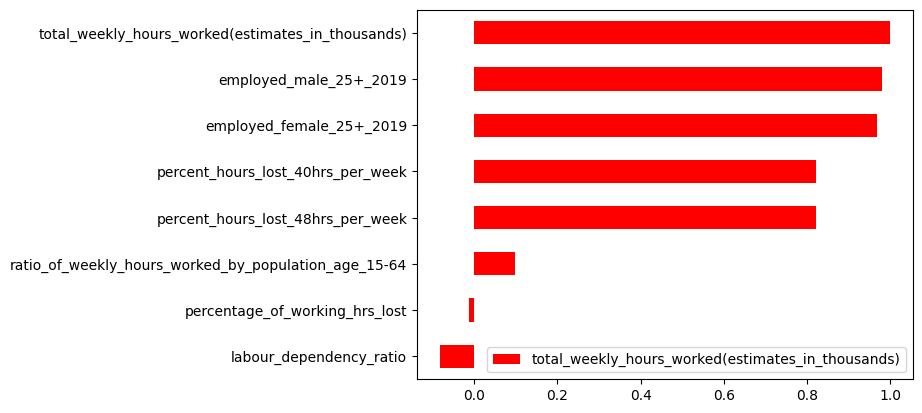

In [28]:
corr=data_sv.corr()[['total_weekly_hours_worked(estimates_in_thousands)']].sort_values(
    by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True)
corr.plot(kind='barh',color='red')

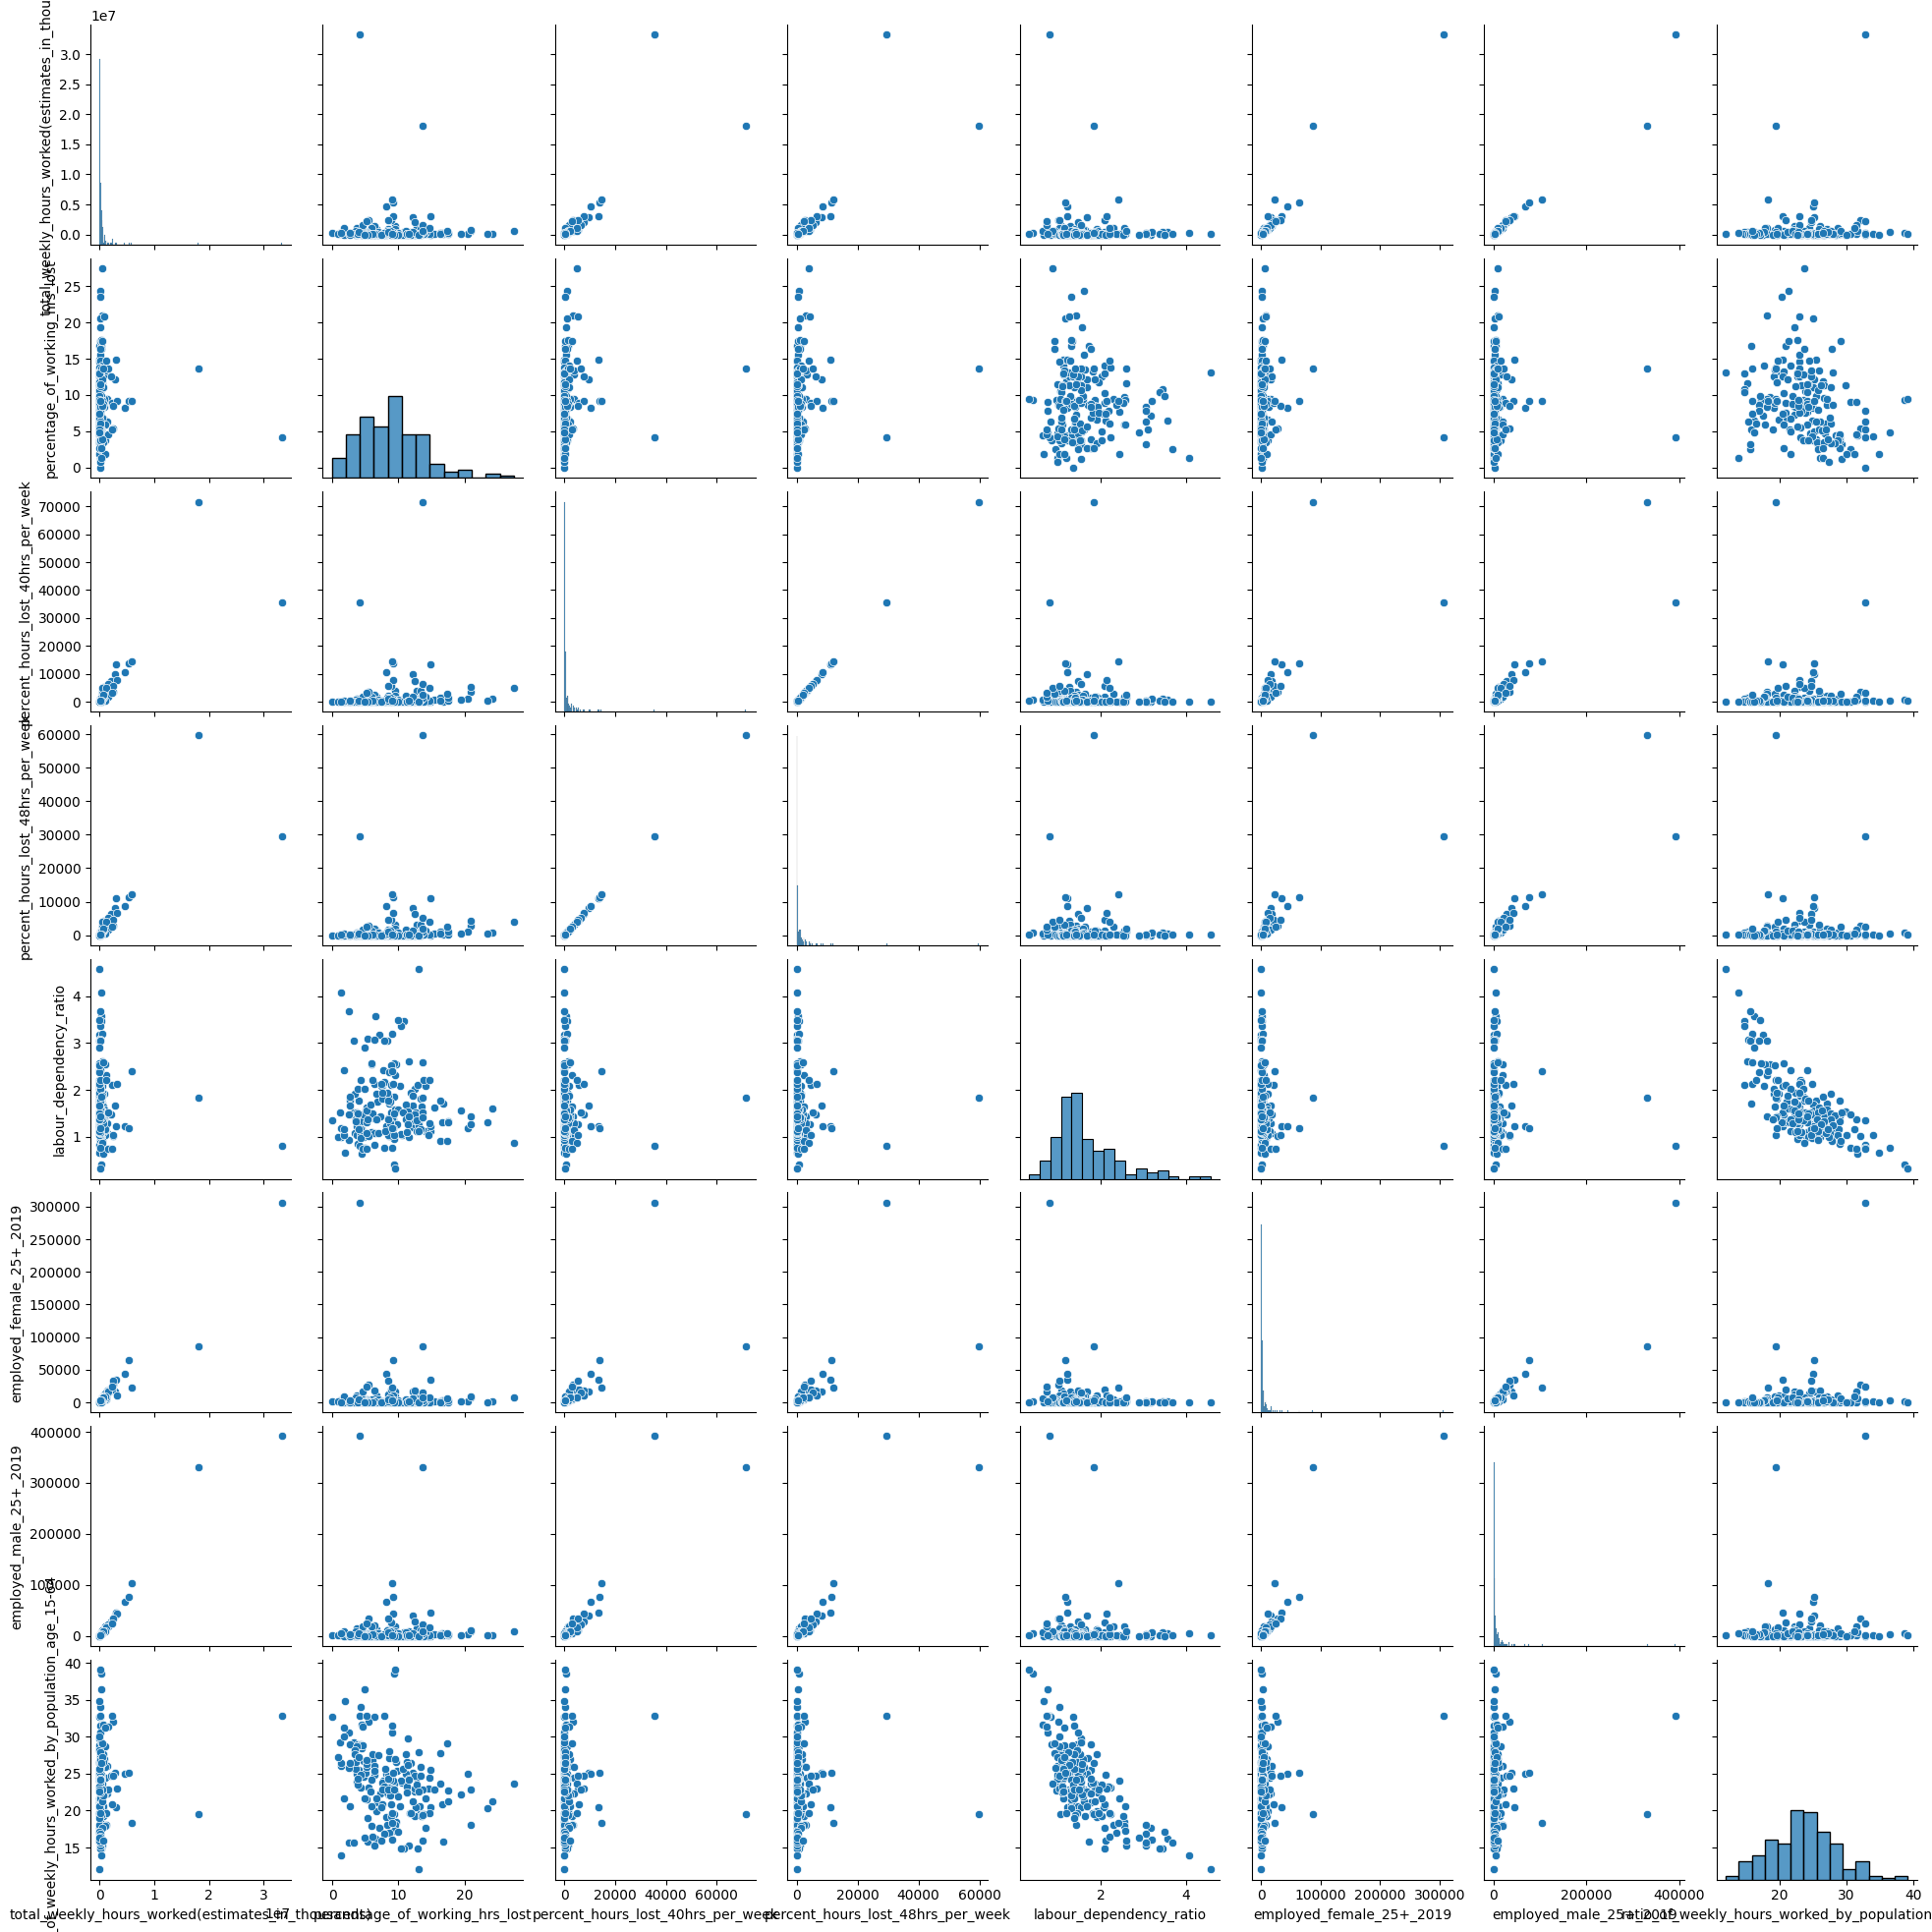

In [29]:
sns.pairplot(data_sv)


array([[<Axes: title={'center': 'total_weekly_hours_worked(estimates_in_thousands)'}>,
        <Axes: title={'center': 'percentage_of_working_hrs_lost'}>,
        <Axes: title={'center': 'percent_hours_lost_40hrs_per_week'}>],
       [<Axes: title={'center': 'percent_hours_lost_48hrs_per_week'}>,
        <Axes: title={'center': 'labour_dependency_ratio'}>,
        <Axes: title={'center': 'employed_female_25+_2019'}>],
       [<Axes: title={'center': 'employed_male_25+_2019'}>,
        <Axes: title={'center': 'ratio_of_weekly_hours_worked_by_population_age_15-64'}>,
        <Axes: >]], dtype=object)

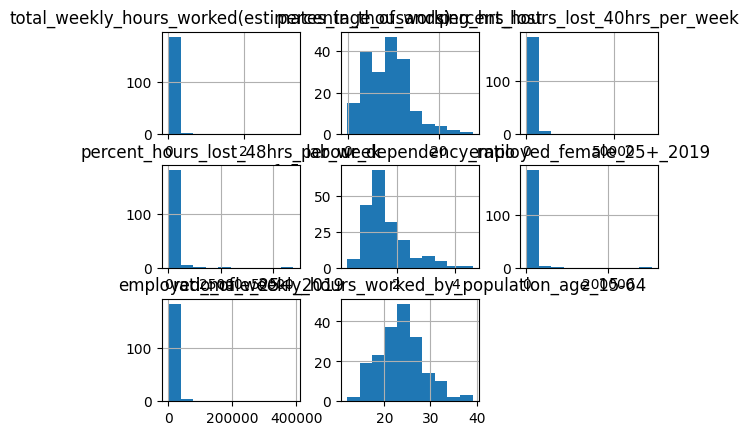

In [30]:
data_sv.hist()

<Axes: ylabel='country'>

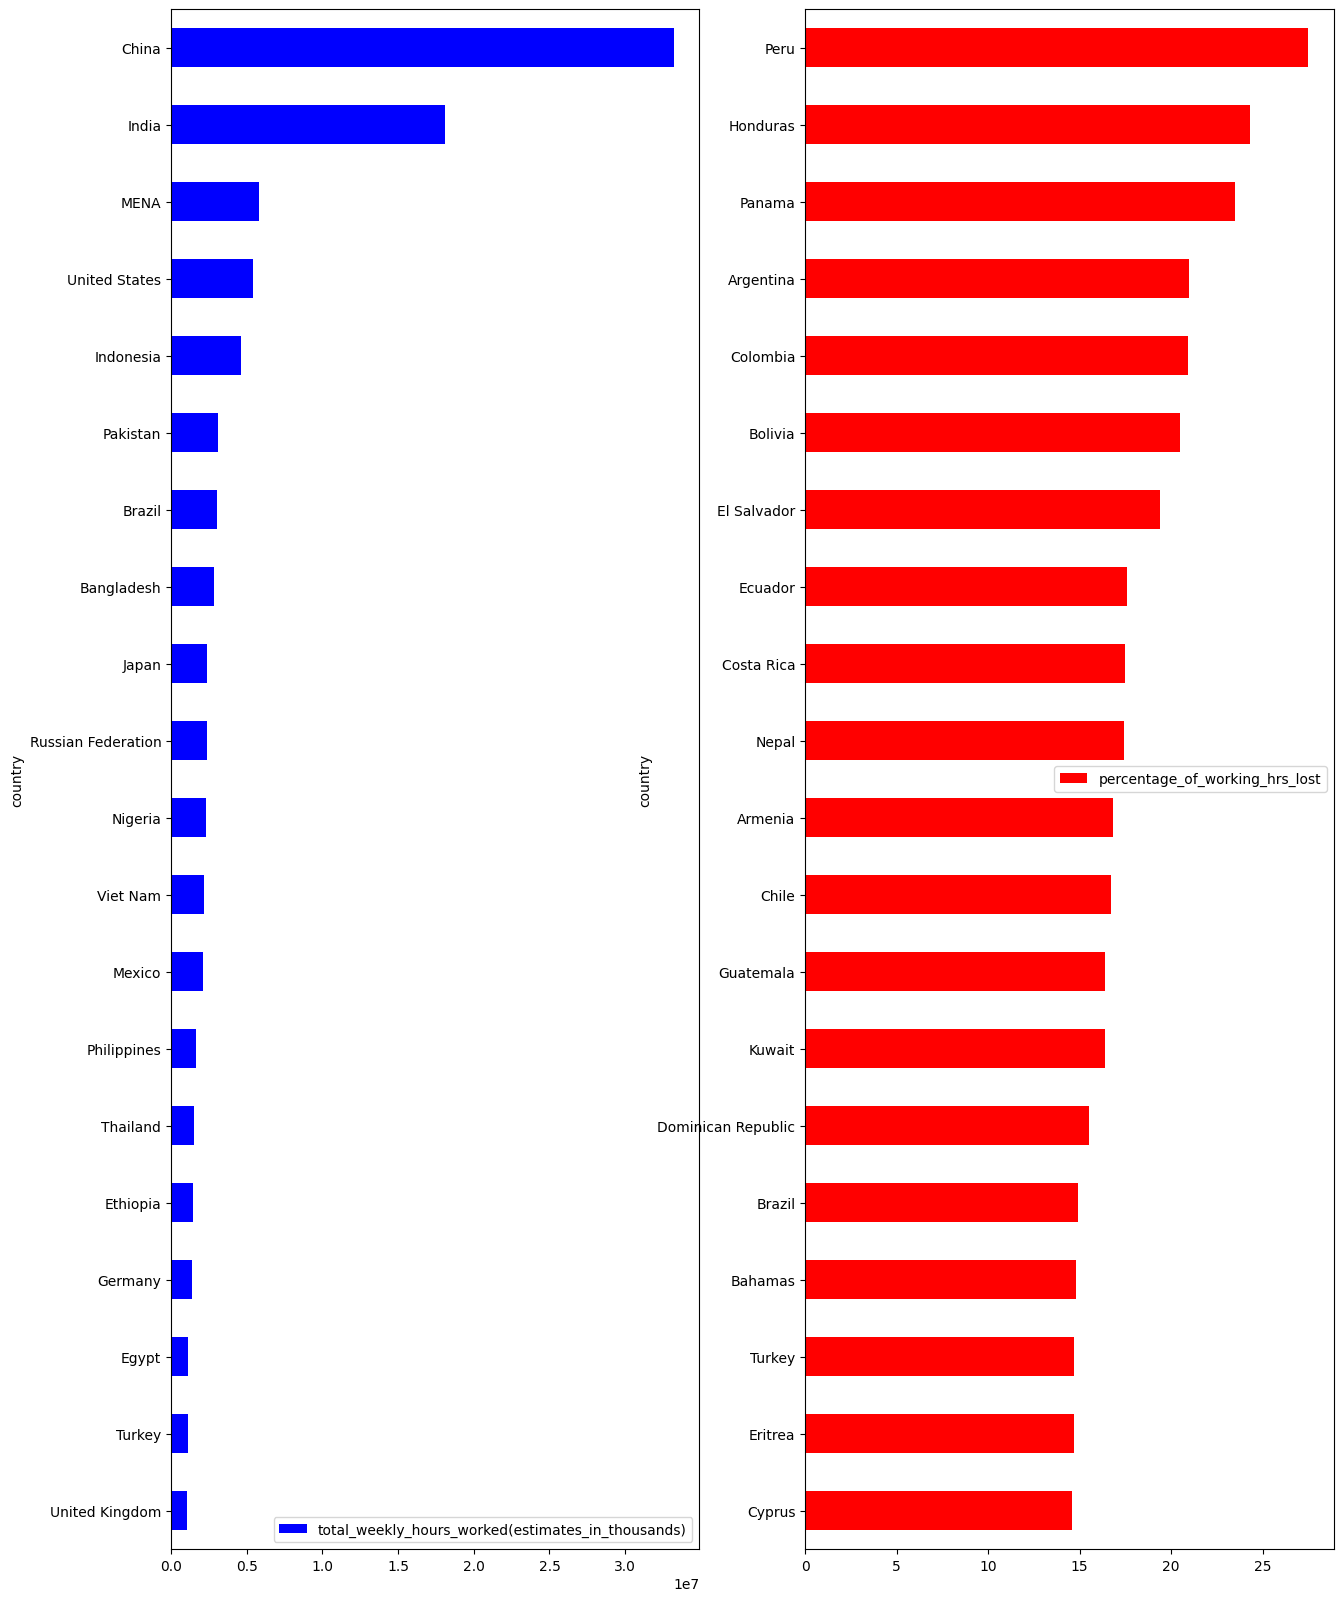

In [31]:
data_work_hour=data_sv.sort_values(by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True).tail(20)
data_hrloss=data_sv.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,20))
data_work_hour.plot(kind='barh',x='country',y='total_weekly_hours_worked(estimates_in_thousands)'
                    ,ax=ax1,color='blue')
data_hrloss.plot(kind='barh',x='country',y='percentage_of_working_hrs_lost'
                    ,ax=ax2,color='red')

In [32]:
data_list2 = ['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean',
       'Central America', 'South America', 'Northern America',
       'Arab States',
       'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific',
       'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20',
       'ASEAN', 'BRICS', 'World excluding BRICS', 'G7','Arab League',
       'European Union 27']

In [33]:
data_sv2 = data[data.country.isin(data_list2)]


In [34]:
data_sv2['country'].unique()


array(['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Northern America', 'Arab States',
       'Asia and the Pacific', 'Eastern Asia',
       'South-Eastern Asia and the Pacific', 'South-Eastern Asia',
       'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20', 'ASEAN', 'BRICS',
       'World excluding BRICS', 'G7', 'Arab League', 'European Union 27'],
      dtype=object)

In [35]:
np.array(['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Northern America', 'Arab States',
       'Asia and the Pacific', 'Eastern Asia',
       'South-Eastern Asia and the Pacific', 'South-Eastern Asia',
       'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20', 'ASEAN', 'BRICS',
       'World excluding BRICS', 'G7', 'Arab League', 'European Union 27'],
      dtype=object)

array(['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Northern America', 'Arab States',
       'Asia and the Pacific', 'Eastern Asia',
       'South-Eastern Asia and the Pacific', 'South-Eastern Asia',
       'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20', 'ASEAN', 'BRICS',
       'World excluding BRICS', 'G7', 'Arab League', 'European Union 27'],
      dtype=object)

<Axes: ylabel='country'>

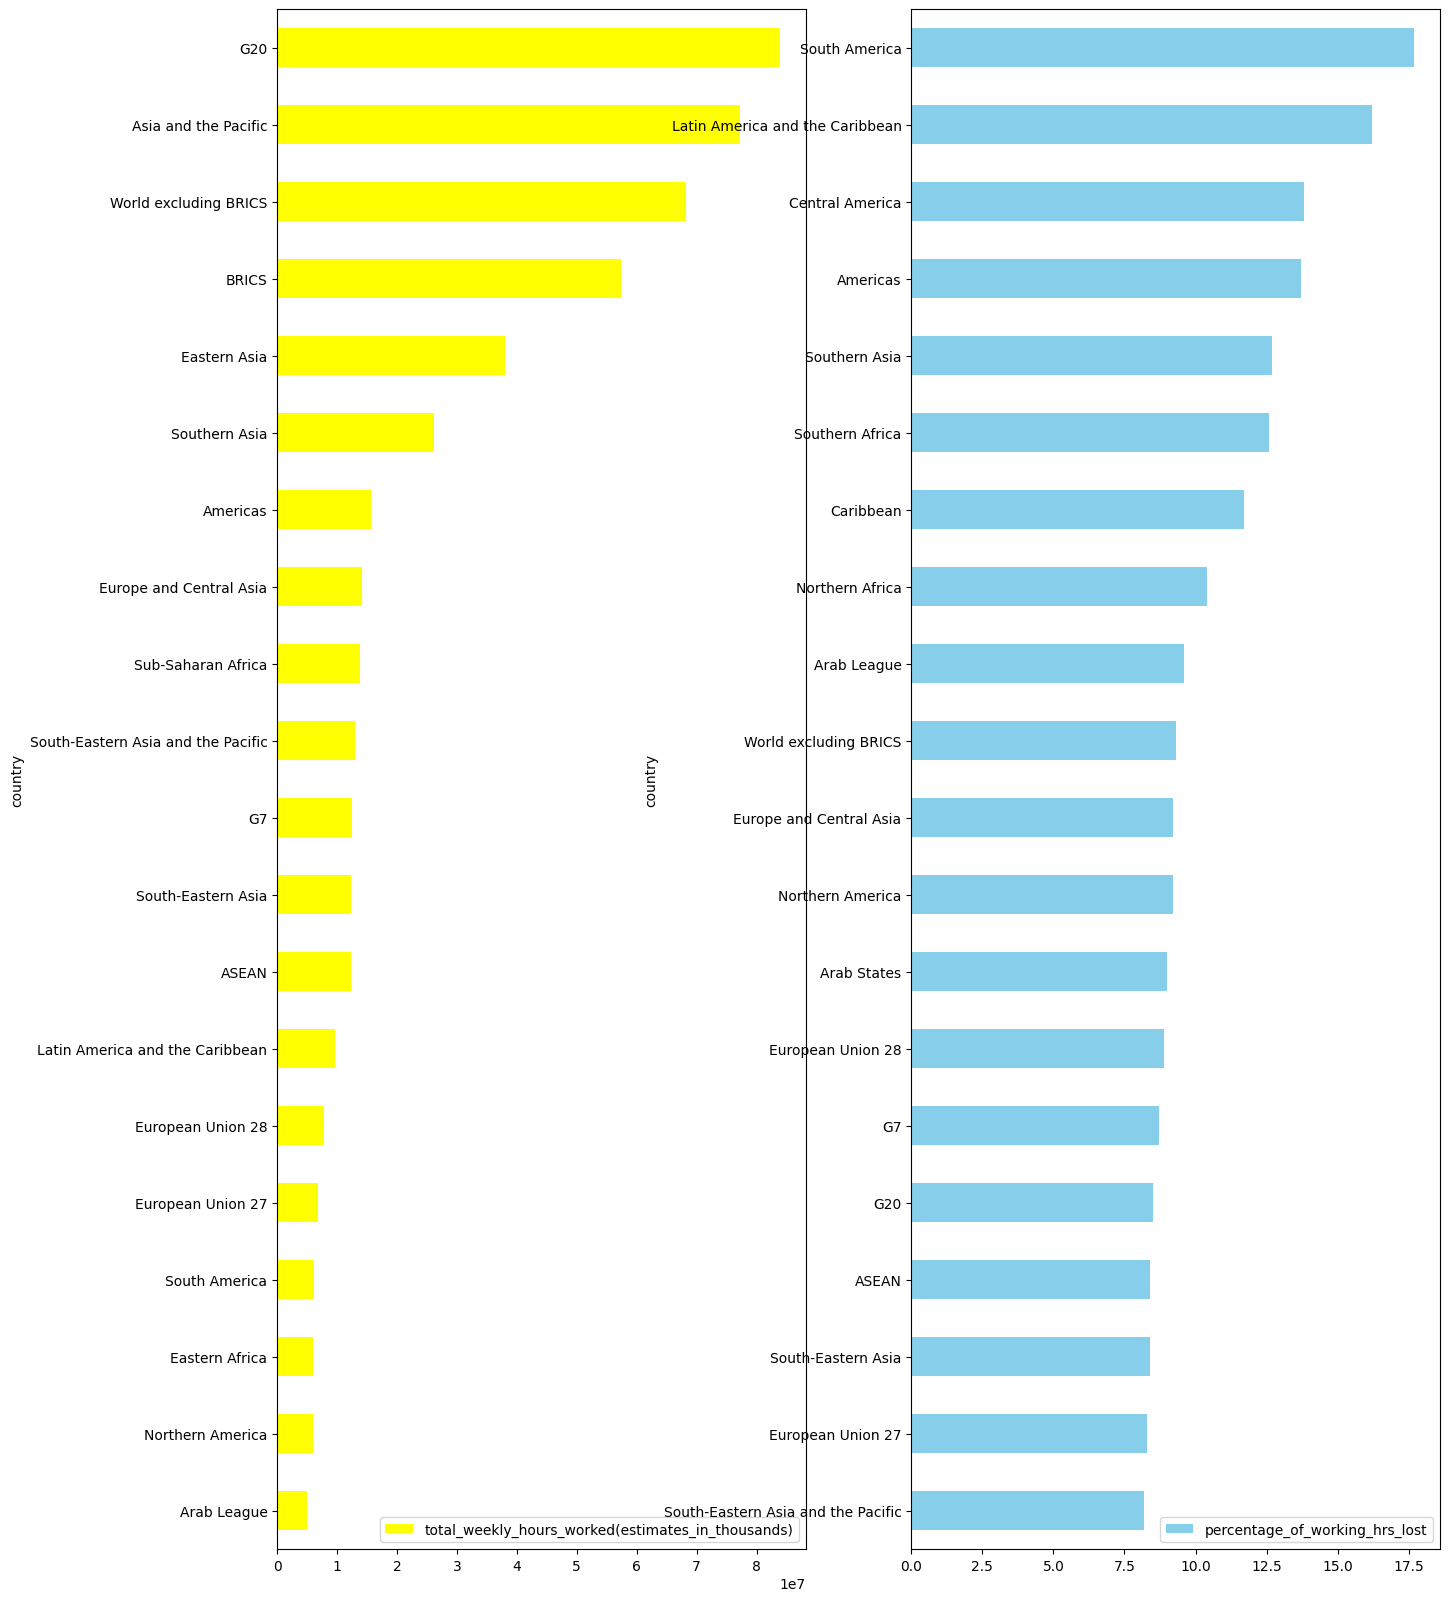

In [36]:
data_work_hour2=data_sv2.sort_values(by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True).tail(20)
data_hrloss2=data_sv2.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,20))
data_work_hour2.plot(kind='barh',x='country',y='total_weekly_hours_worked(estimates_in_thousands)'
                    ,ax=ax1,color='yellow')
data_hrloss2.plot(kind='barh',x='country',y='percentage_of_working_hrs_lost'
                    ,ax=ax2,color='skyblue')

array([[<Axes: title={'center': 'total_weekly_hours_worked(estimates_in_thousands)'}>,
        <Axes: title={'center': 'percentage_of_working_hrs_lost'}>,
        <Axes: title={'center': 'percent_hours_lost_40hrs_per_week'}>],
       [<Axes: title={'center': 'percent_hours_lost_48hrs_per_week'}>,
        <Axes: title={'center': 'labour_dependency_ratio'}>,
        <Axes: title={'center': 'employed_female_25+_2019'}>],
       [<Axes: title={'center': 'employed_male_25+_2019'}>,
        <Axes: title={'center': 'ratio_of_weekly_hours_worked_by_population_age_15-64'}>,
        <Axes: >]], dtype=object)

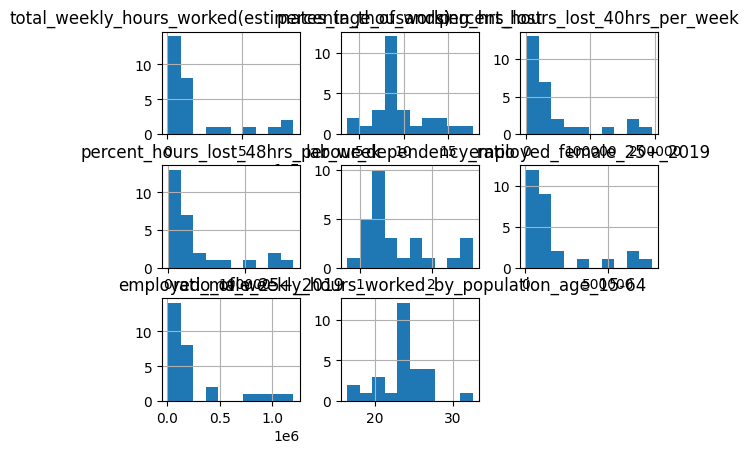

In [37]:
data_sv2.hist()


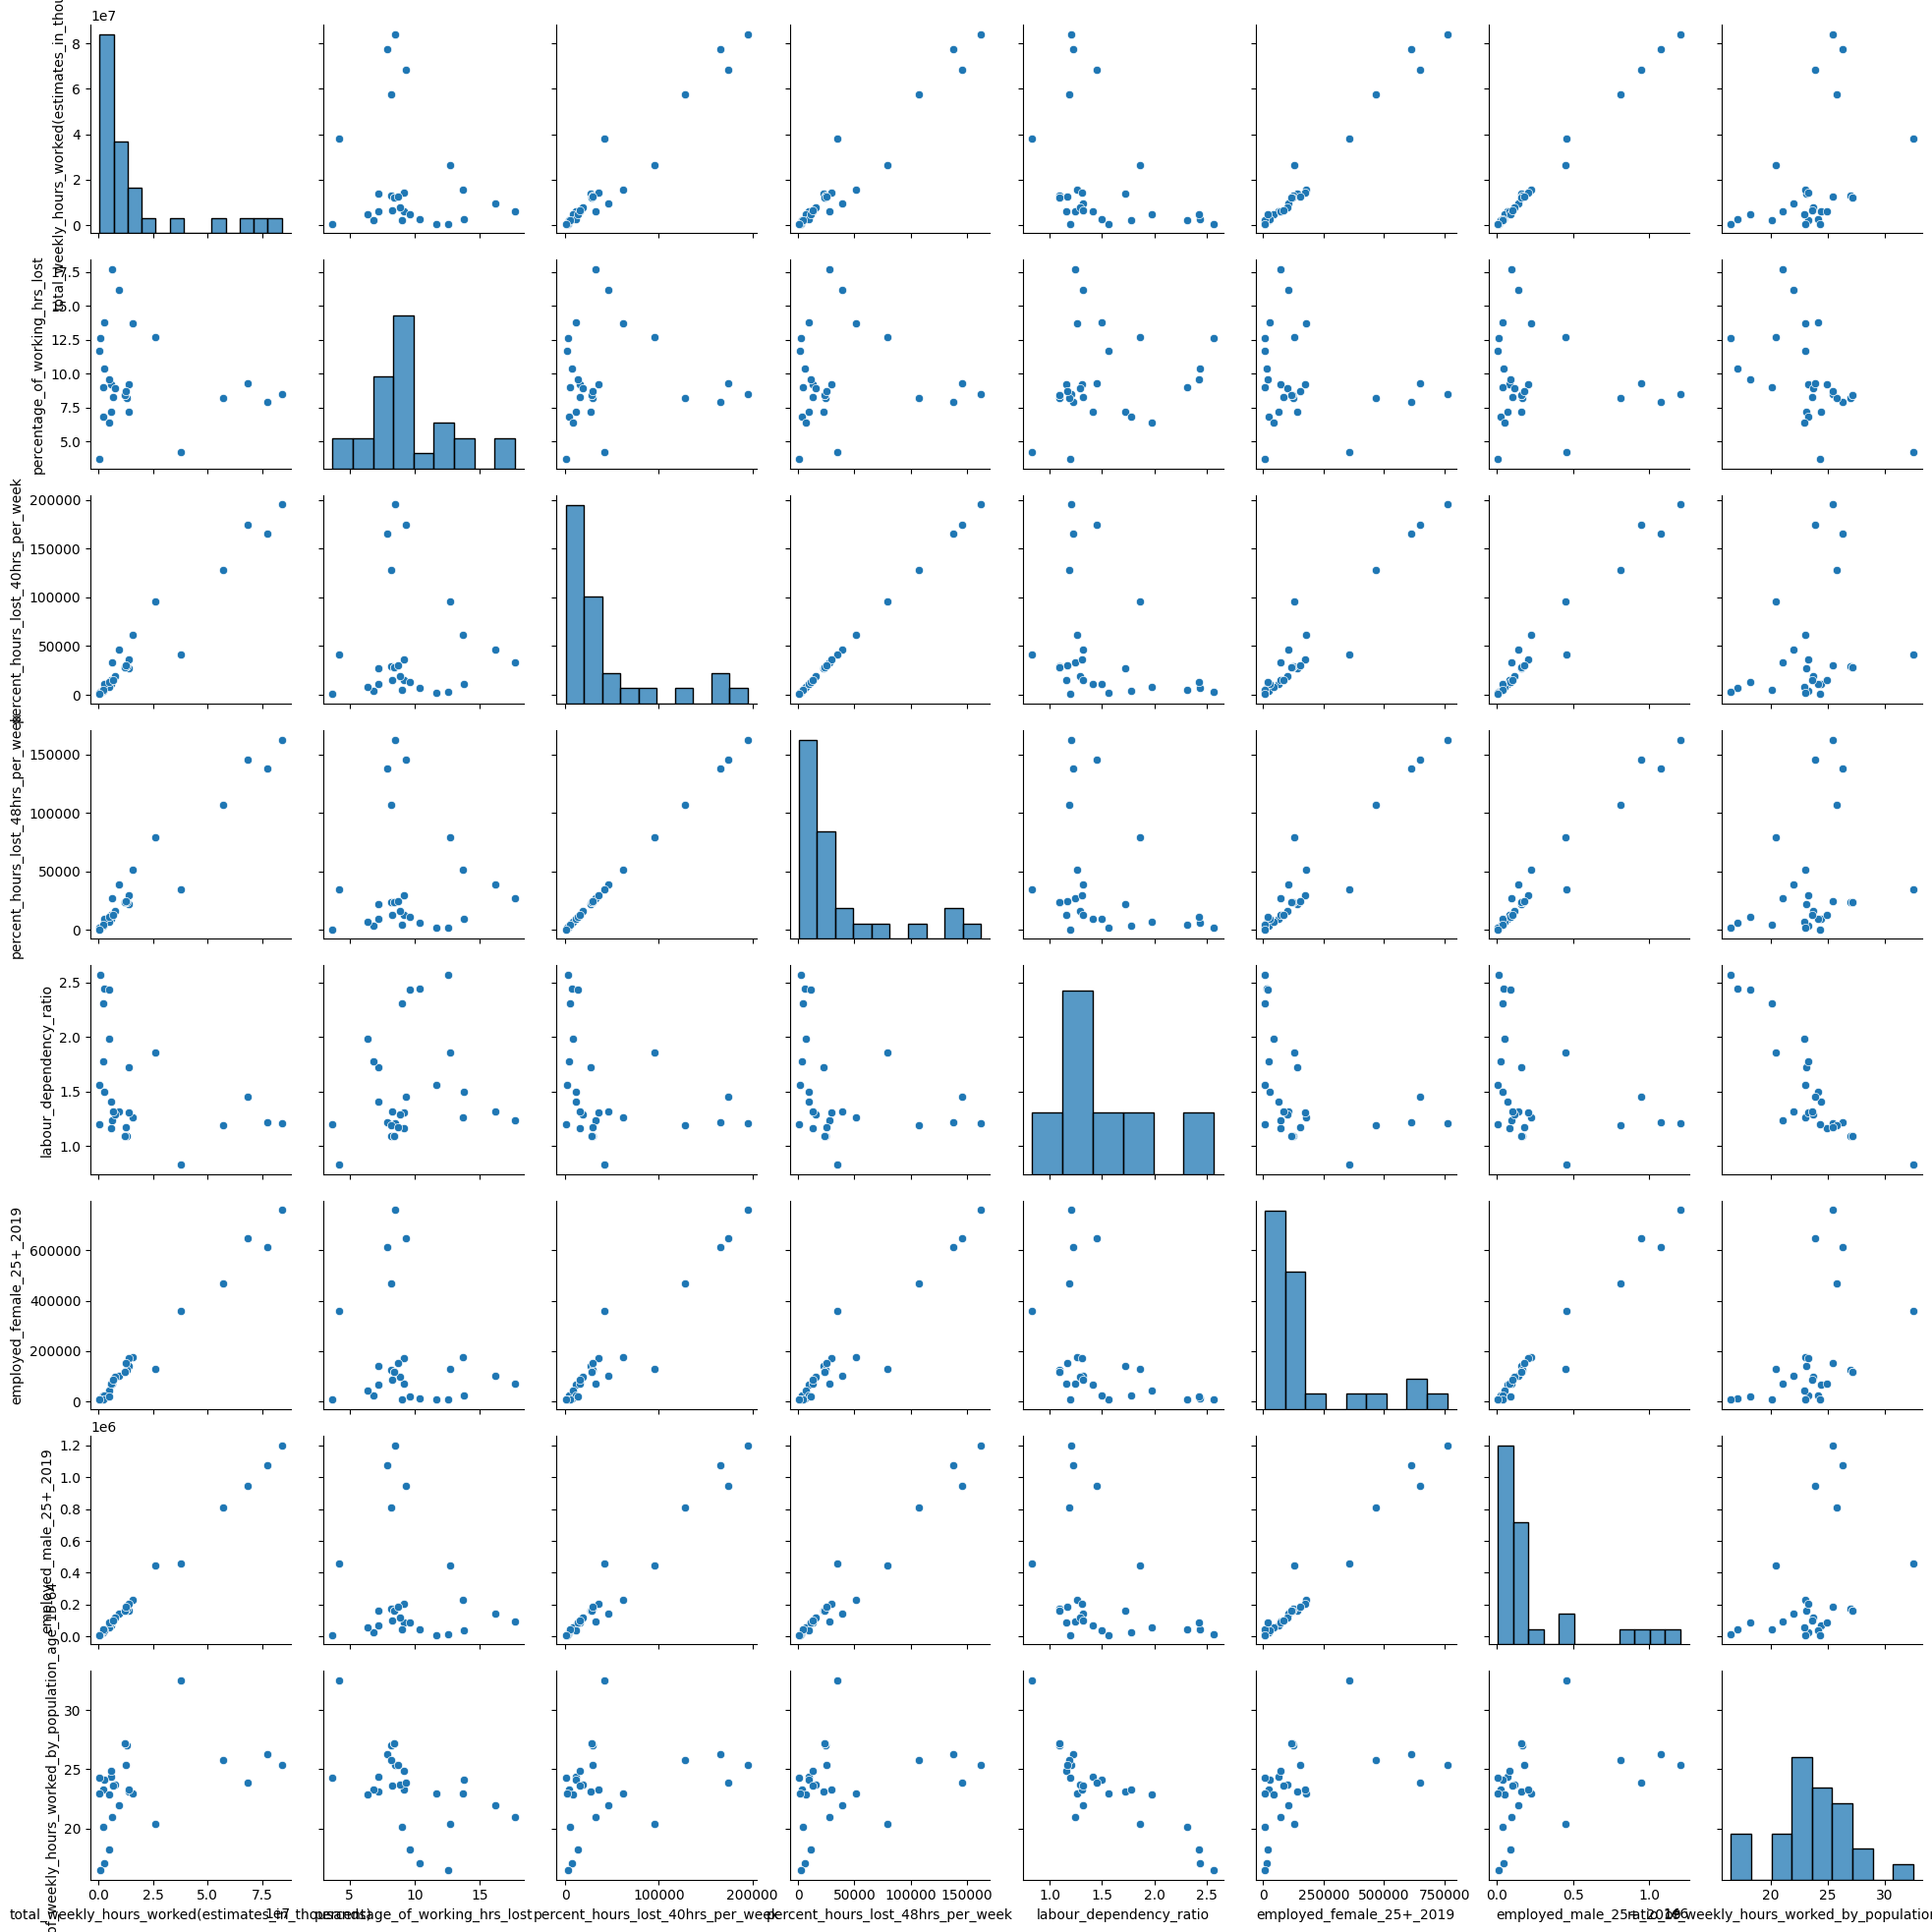

In [38]:
sns.pairplot(data_sv2)


In [39]:
code=['AFG','AGO','ALB','ARE','ARG','ARM','AUS','AUT','AZE','BDI','BEL','BEN','BFA',
'BGD','BGR','BHR','BHS','BIH','BLR','BLZ','BOL','BRA','BRB','BRN','BTN','BWA','CAF',
'CAN','CCK','CHE','CHL','CHN','CIV','CMR','COD','COG','COL','COM','CPV','CRI','CUB',
'CYP','CZE','DEU','DJI','DNK','DOM','DZA','ECU','EGY','ERI','ESH','ESP','EST','ETH',
'FIN','FJI','FRA','GAB','GBR','GEO','GHA','GIN','GMB','GNB','GNQ','GRC','GTM','GUM',
'GUY','HKG','HND','HRV','HTI','HUN','IDN','IND','IRL','IRN','IRQ','ISL','ISR','ITA',
'JAM','JOR','JPN','KAZ','KEN','KGZ','KHM','KOR','KWT','LAO','LBN','LBR','LBY','LCA',
'LKA','LSO','LTU','LUX','LVA','MAC','MAR','MDA','MDG','MDV','MEX','MKD','MLI','MLT',
'MMR','MNE','MNG','MOZ','MRT','MUS','MWI','MYS','NAM','NCL','NER','NGA','NIC','NLD',
'NOR','NPL','NZL','OMN','PAK','PAN','PER','PHL','PNG','POL','PRI','PRK','PRT','PRY',
'PSE','PYF','QAT','ROU','RUS','RWA','SAU','SDN','SEN','SGP','SLB','SLE','SLV','SOM',
'SRB','SSD','STP','SUR','SVK','SVN','SWE','SWZ','SYR','TCD','TGO','THA','TJK','TKM',
'TLS','TON','TTO','TUN','TUR','TWN','TZA','UGA','UKR','URY','USA','UZB','VCT','VEN',
'VIR','VNM','VUT','WSM','YEM','ZAF','ZMB','ZWE']

In [40]:
df1=data.drop(range(185,279))
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 282
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               189 non-null    object 
 1   total_weekly_hours_worked(estimates_in_thousands)     189 non-null    float64
 2   percentage_of_working_hrs_lost                        189 non-null    float64
 3   percent_hours_lost_40hrs_per_week                     189 non-null    float64
 4   percent_hours_lost_48hrs_per_week                     189 non-null    float64
 5   labour_dependency_ratio                               189 non-null    float64
 6   employed_female_25+_2019                              189 non-null    float64
 7   employed_male_25+_2019                                189 non-null    float64
 8   ratio_of_weekly_hours_worked_by_population_age_15-64  189 non

In [41]:
df1.head()

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
0,Afghanistan,350285.606,6.5,607.476,506.230,3.57,1334.243,5424.911,16.2
1,Angola,457913.433,8.6,1075.838,896.532,1.70,4612.109,4724.669,27.1
2,Albania,49922.483,3.9,51.087,42.572,1.77,500.112,651.870,25.5
3,United Arab Emirates,320690.368,9.3,824.579,687.149,0.41,996.030,5111.770,38.6
4,Argentina,525994.010,21.0,3492.559,2910.466,1.43,7264.330,9496.191,18.1


<ipython-input-42-3ed1a1a51dc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

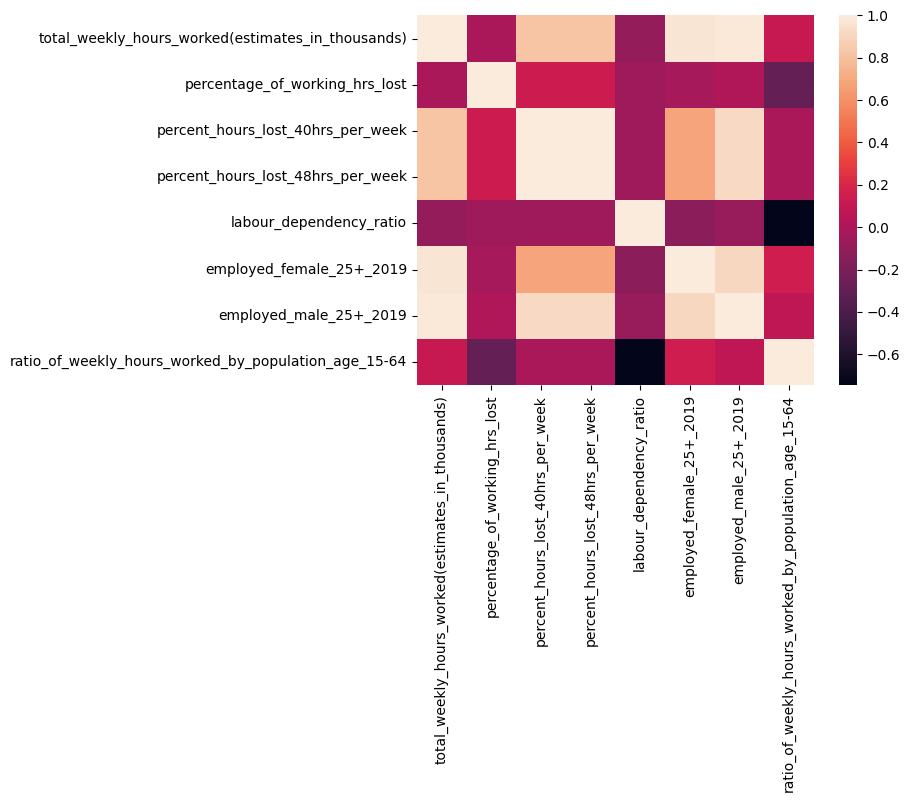

In [42]:
sns.heatmap(df1.corr())

# Impact of Covid 19 to Work Analysis by Mapping

In [43]:
df1['code']=code
df2=df1.loc[:,['country','code']]

In [44]:
df1.rename(columns={'total_weekly_hours_worked(estimates_in_thousands)': 'A',
                    'percentage_of_working_hrs_lost': 'B',
                    'percent_hours_lost_40hrs_per_week':'C',
                    'percent_hours_lost_48hrs_per_week':'D',
                    'labour_dependency_ratio':'E',
                    'employed_female_25+_2019':'F',
                    'employed_male_25+_2019':'G',
                    'ratio_of_weekly_hours_worked_by_population_age_15-64':'H'}, inplace=True)

In [45]:
fig = px.choropleth(df1, locations='code', color='A', scope='world',
                    color_continuous_scale='Viridis',  # A visually pleasing color scale
                    labels={'A': 'Total Weekly Hours Worked'},  # Label for the color scale
                    title='Global Total Weekly Hours Worked by Employed Persons')  # Title for the map

# Update the layout for a cleaner look
fig.update_layout(
    geo=dict(
        showframe=False,  # Removes the frame around the map
        showcoastlines=False,  # Removes the coastlines
        projection_type='equirectangular'  # Map projection type
    ),
    title=dict(  # Update title positioning and font
        x=0.5,  # Center the title
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Update color bar positioning and title
        title='Hours Worked',  # Title for the color bar
        lenmode='fraction',  # Make the color bar size relative to the map size
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()

In [46]:
fig = px.choropleth(df1, locations='code', color='B', scope='world',
                    color_continuous_scale='YlOrRd',  # Color scale for visualization
                    labels={'B': '% of Working Hours Lost'},  # Label for the color scale
                    title='Global Percentage of Working Hours Lost due to COVID-19')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='% Hours Lost',  # Title for the color bar
        ticksuffix='%',  # Suffix for the color bar values
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()

In [47]:
fig = px.choropleth(df1, locations='code', color='C', scope='world',
                    color_continuous_scale='OrRd',  # A color scale for the visualization
                    labels={'C': 'Full-Time Eq. Employment Losses (Thousands)'},  # Label for the color scale
                    title='Global Full-Time Equivalent Employment Losses due to COVID-19')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Hours Lost (k)',  # Title for the color bar
        ticksuffix='k',  # Suffix for the color bar values
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()

In [48]:
fig = px.choropleth(df1, locations='code', color='D', scope='world',
                    color_continuous_scale='Plasma',  # A color scale for the visualization
                    labels={'D': 'Full-Time Eq. Employment Losses (Thousands)'},  # Label for the color scale
                    title='Global Full-Time Equivalent Employment Losses per 48-Hour Week due to COVID-19')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Hours Lost (k)',  # Title for the color bar
        ticksuffix='k',  # Suffix for the color bar values
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()


In [49]:
fig = px.choropleth(df1, locations='code', color='E', scope='world',
                    color_continuous_scale='Sunsetdark',  # A color scale for the visualization
                    labels={'E': 'Labor Dependency Ratio'},  # Label for the color scale
                    title='Global Labor Dependency Ratio')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Dependency Ratio',  # Title for the color bar
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()

In [50]:
fig = px.choropleth(df1, locations='code', color='F', scope='world',
                    color_continuous_scale='Viridis',  # A color scale for the visualization
                    labels={'F': 'Employed Females 25+ (in thousands)'},  # Label for the color scale
                    title='Employment of Females Aged 25+ in 2019 (in thousands)')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Employed Females (Thousands)',  # Title for the color bar
        ticksuffix='k',  # Suffix for the color bar values
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Show the figure
fig.show()

In [51]:
fig = px.choropleth(df1, locations='code', color='G', scope='world',
                    color_continuous_scale='YlGnBu',  # A color scale for the visualization
                    labels={'G': 'Employed Males 25+ (in thousands)'},  # Label for the color scale
                    title='Employment of Males Aged 25+ in 2019 (in thousands)')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Employed Males (Thousands)',  # Title for the color bar
        ticksuffix='k',  # Suffix for the color bar values
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Display the figure
fig.show()

In [52]:
fig = px.choropleth(df1, locations='code', color='H', scope='world',
                    color_continuous_scale='Magma',  # A color scale for the visualization
                    labels={'H': 'Ratio of Weekly Hours Worked'},  # Label for the color scale
                    title='Ratio of Total Weekly Hours Worked to Population Aged 15-64')  # Title for the map

# Update the layout to adjust the appearance
fig.update_layout(
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=False,  # Hide coastlines for a cleaner look
        projection_type='equirectangular'  # Choose a projection type
    ),
    title=dict(  # Adjust the title's appearance and position
        x=0.5,  # Center the title horizontally
        xanchor='center',
        yanchor='top'
    ),
    coloraxis_colorbar=dict(  # Adjust the color bar's appearance and position
        title='Hours Worked Ratio',  # Title for the color bar
        lenmode='fraction',  # Use fraction of the map size for color bar length
        len=0.75  # Length of the color bar
    )
)

# Display the figure
fig.show()

# Modeling on Employee Dataset
 ## Decision Tree
 ## Support Vector Regression
 ## Random Forest
 ## Linear Regression





In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
employment_data = pd.read_csv('/employment_data.csv')  # Make sure to provide the correct path to your data

# Selecting features and target for modeling
# Define the features (X) and target (y)
target_variable = 'percentage_of_working_hrs_lost'
features = [
    'total_weekly_hours_worked(estimates_in_thousands)',
    'percent_hours_lost_40hrs_per_week',
    'percent_hours_lost_48hrs_per_week',
    'labour_dependency_ratio',
    'employed_female_25+_2019',
    'employed_male_25+_2019',
    'ratio_of_weekly_hours_worked_by_population_age_15-64'
]

X = employment_data[features]
y = employment_data[target_variable]


# X = employment_data.drop(['country', 'percentage_of_working_hrs_lost'], axis=1)
# y = employment_data['percentage_of_working_hrs_lost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Initialize models
svr_model = SVR()

# Train the models
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)
# Evaluate the models
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Display the metrics
print("Support Vector Regression RMSE:",svr_mse)
print("Support Vector Regression R2:",svr_r2)


Support Vector Regression RMSE: 17.247697536163756
Support Vector Regression R2: 0.004897412008829871


In [61]:

# Initialize models
linear_model = LinearRegression()

# Train the models
linear_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)

# Evaluate the models

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Print out the metrics
print("Linear Regression RMSE:", linear_mse)

print("Linear Regression R2:", linear_r2)


Linear Regression RMSE: 13.517762681332137
Linear Regression R2: 0.22009528519155752


In [62]:
# Initialize models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
random_forest_model.fit(X_train, y_train)

# Make predictions
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print out the metrics
print("Random Forest RMSE:", rf_mse)

print("Random Forest R2:", rf_r2)



Random Forest RMSE: 4.030932526315792
Random Forest R2: 0.767436124123568


In [63]:

# Initialize the models
dt_model = DecisionTreeRegressor(random_state=42)

# Train the models
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the models
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

# Print out the metrics
print("Decision Tree RMSE:", dt_rmse)

print("Decision Tree R2:", dt_r2)



Decision Tree RMSE: 2.8049142339203748
Decision Tree R2: 0.5460835720561797


In [64]:

# Display the metrics
print(f"Support Vector Regression - MSE: {svr_mse}, R2: {svr_r2}")
print(f"Linear Regression - MSE: {linear_mse}, R2: {linear_r2}")
print(f"Decision Tree - MSE: {dt_rmse}, R2: {dt_r2}")
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

# Compare the models based on R2 score
print(f"The best model is: Random Forest")


Support Vector Regression - MSE: 17.247697536163756, R2: 0.004897412008829871
Linear Regression - MSE: 13.517762681332137, R2: 0.22009528519155752
Decision Tree - MSE: 2.8049142339203748, R2: 0.5460835720561797
Random Forest - MSE: 4.030932526315792, R2: 0.767436124123568
The best model is: Random Forest
